# Project(Problem Statement): Fake News Detection Model using TensorFlow

**• Objective:**
Develop a deep learning model using TensorFlow to classify news
articles as FAKE or REAL based on their text content.

**• Dataset: Fake News Dataset**

# Load required Python libraries:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load the dataset using Pandas and explore its structure.

In [2]:
# Load dataset
df = pd.read_csv("news.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Data Insights

In [3]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# **Convert text data into numerical format using Tokenization.**

In [4]:
# Clean text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})
df['main_text'] = df['title'] + ' ' + df['clean_text']

# Convert labels (FAKE, REAL) into binary values (0,1).

In [5]:
# Drop unnecessary columns
processed_data = df.drop(['title', 'text', 'clean_text'], axis=1)

In [6]:
processed_data.head()

,label,main_text
0,0,You Can Smell Hillary’s Fear daniel greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy u ...
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...


# Split dataset into training and testing sets (80%-20%).

In [7]:
# Prepare training data
X = processed_data['main_text']
y = processed_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 20000
max_length = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


In [9]:
print(processed_data['label'].value_counts())

label
1    3171
0    3164
Name: count, dtype: int64


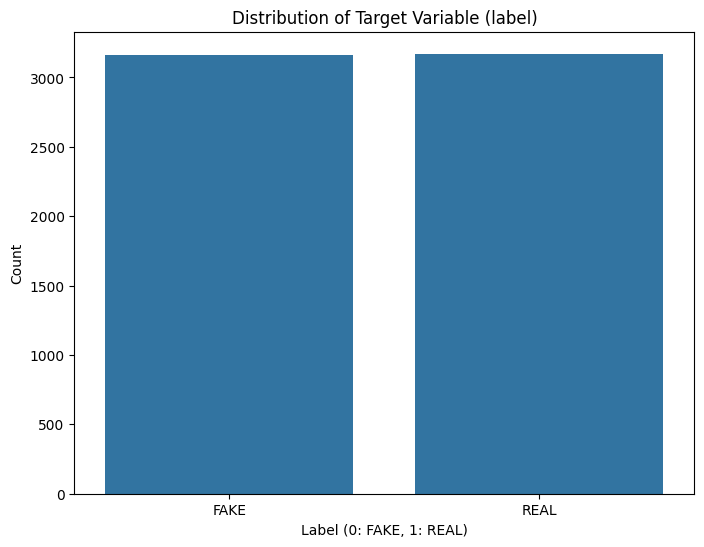

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=processed_data)
plt.title('Distribution of Target Variable (label)')
plt.xlabel('Label (0: FAKE, 1: REAL)')
plt.ylabel('Count')
plt.xticks([0, 1], ['FAKE', 'REAL'])
plt.show()

In [11]:
%pip install gensim

# Create the Embedding Matrix

In [12]:
import numpy as np
import pandas as pd # Import pandas
import re # Import re
import string # Import string
import nltk # Import nltk
from nltk.corpus import stopwords # Import stopwords
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer
from sklearn.model_selection import train_test_split # Import train_test_split
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === 0. Data Loading and Preprocessing ===
# Load dataset
df = pd.read_csv("news.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Clean text data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})
df['main_text'] = df['title'] + ' ' + df['clean_text']

# Drop unnecessary columns
processed_data = df.drop(['title', 'text', 'clean_text'], axis=1)

# Prepare training data
X = processed_data['main_text']
y = processed_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# === 1. Load Word2Vec pretrained model ===
import gensim.downloader as api
print("Loading Word2Vec model...")
word2vec_model = api.load("word2vec-google-news-300")  # ~1.6GB
print("Word2Vec model loaded.")

# === 2. Prepare tokenizer and sequences ===
vocab_size = 20000
max_length = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)  # Make sure X_train is preprocessed
word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# === 3. Create the Embedding Matrix ===
embedding_dim = 300  # Word2Vec Google News vectors are 300-dimensional
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i >= vocab_size:
        continue
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec model loaded.


# Build the Model with Word2Vec Embedding

# Model Architecture:

• Define a Sequential Deep Learning Model using TensorFlow:

o Input Layer (Embedding Layer).

o LSTM (Long Short-Term Memory) Layer for text processing.

o Dense Layers for classification.

o Activation function: Sigmoid for binary classification.

In [15]:
#  Build the Model with Word2Vec Embedding ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=max_length,
        weights=[embedding_matrix],
        trainable=False,  # Set to True if you want to fine-tune Word2Vec
        mask_zero=False
    ),
    Bidirectional(LSTM(
        units=64,
        activation='tanh',
        recurrent_activation='sigmoid',
        use_bias=True,
        kernel_initializer='glorot_uniform',
        recurrent_initializer='orthogonal',
        bias_initializer='zeros',
        unit_forget_bias=True,
        dropout=0.2,
        recurrent_dropout=0.2,
        return_sequences=False
    )),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Compile the model using Binary Crossentropy Loss and Adam Optimizer.

In [16]:
# === 5. Compile the model ===
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,000,000 (22.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,000,000 (22.89 MB)

In [17]:
# Ensure your labels are NumPy arrays or Pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train)
print(y_test)

[1 0 0 ... 0 0 0]
[1 0 1 ... 1 0 1]


In [18]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


# Train the model on training data.

In [20]:
model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weight_dict
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.5790 - loss: 0.6626 - val_accuracy: 0.8077 - val_loss: 0.4583
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8019 - loss: 0.4643 - val_accuracy: 0.8314 - val_loss: 0.3952
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8195 - loss: 0.4164 - val_accuracy: 0.8531 - val_loss: 0.3554
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8520 - loss: 0.3484 - val_accuracy: 0.8373 - val_loss: 0.3836
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8557 - loss: 0.3497 - val_accuracy: 0.8600 - val_loss: 0.3343
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8753 - loss: 0.3039 - val_accuracy: 0.8402 - val_loss: 0.3587
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8766 - loss: 0.3016 - val_accuracy: 0.8491 - val_loss: 0.3528
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8806 - loss: 0.2894 - val_accuracy: 0.8540 - v

# Visualizing the results

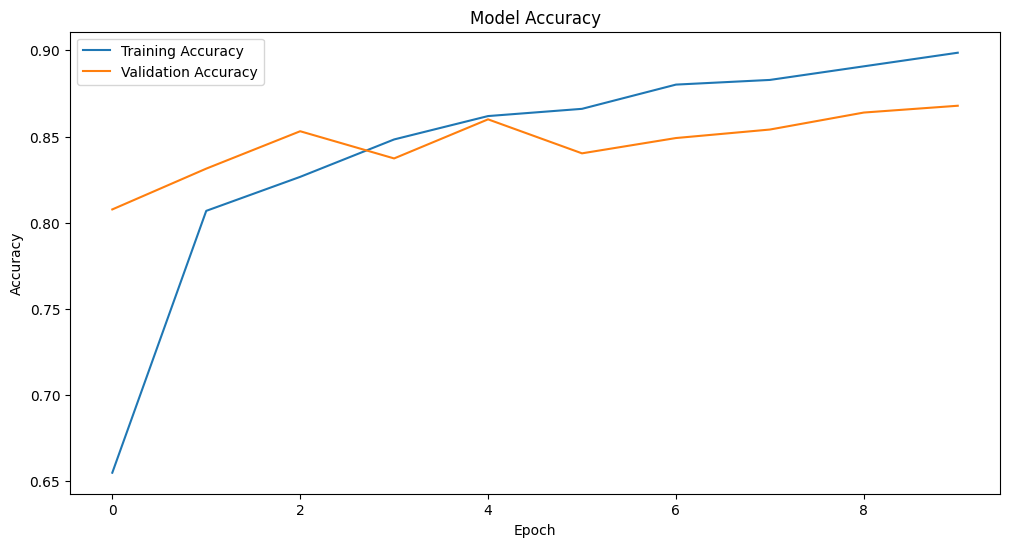

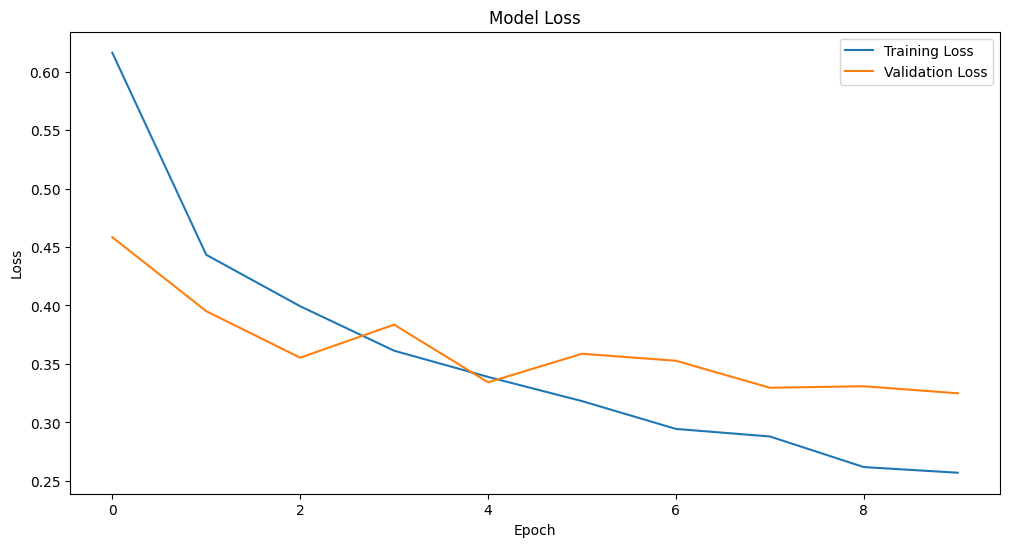

In [21]:
# Display Training Results
import matplotlib.pyplot as plt

history = model.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
#  Calculate Test Accuracy
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.8740 - loss: 0.2834
Test Accuracy: 0.8674


In [23]:
# Compare Training, Test, and Validation Results

# Get metrics from training history
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

# Get test metrics
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)

print("--- Model Performance Comparison ---")
print(f"Training Accuracy:   {train_accuracy:.4f}")
print(f"Training Loss:       {train_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss:     {val_loss:.4f}")
print(f"Test Accuracy:       {test_accuracy:.4f}")
print(f"Test Loss:           {test_loss:.4f}")

--- Model Performance Comparison ---
Training Accuracy:   0.8986
Training Loss:       0.2570
Validation Accuracy: 0.8679
Validation Loss:     0.3249
Test Accuracy:       0.8674
Test Loss:           0.2852


# Model Evaluation and Prediction:

In [24]:
# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 346ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       633
           1       0.88      0.85      0.86       634

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267


Confusion Matrix:
[[563  70]
 [ 98 536]]


# RESULT INTERPRETATION

Precision: The model is slightly better at predicting malignant tumors (Class 1).

Recall: It detects benign tumors (Class 0) slightly more effectively.

F1-Score: Balanced performance between both classes.

# Confusion Matrix:

True Positives (Class 1 correctly identified): 536

True Negatives (Class 0 correctly identified): 563

False Positives (Class 0 predicted as 1): 70

False Negatives (Class 1 predicted as 0): 98

# Test the model on new unseen news articles

In [25]:

# Define some new news articles
new_articles = [
    "Headline: Scientists Discover New Planet Text: Astronomers have found a new exoplanet in the Kepler-186 system, raising hopes for finding life beyond Earth.",
    "Headline: Local Politician Caught in Scandal Text: Reports indicate that a local politician is under investigation for misuse of public funds."
]

# Preprocess the new articles (using the same clean_text function, tokenizer, and max_length)
cleaned_new_articles = [clean_text(article) for article in new_articles]
new_articles_seq = tokenizer.texts_to_sequences(cleaned_new_articles)
new_articles_pad = pad_sequences(new_articles_seq, maxlen=max_length, padding='post', truncating='post')

# Predict the labels for the new articles
predictions = model.predict(new_articles_pad)
predicted_classes = (predictions > 0.5).astype(int)

# Display the predictions
print("Predictions for new articles (0: FAKE, 1: REAL):")
for i, article in enumerate(new_articles):
    print(f"Article {i+1}:")
    print(f"  Text: {article}")
    print(f"  Predicted Label: {predicted_classes[i][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Predictions for new articles (0: FAKE, 1: REAL):
Article 1:
  Text: Headline: Scientists Discover New Planet Text: Astronomers have found a new exoplanet in the Kepler-186 system, raising hopes for finding life beyond Earth.
  Predicted Label: 0
Article 2:
  Text: Headline: Local Politician Caught in Scandal Text: Reports indicate that a local politician is under investigation for misuse of public funds.
  Predicted Label: 0


# Conclusion & Limitation:

The model performs well with a balanced and high classification score for both tumor types.

Slight misclassification exists, especially in detecting malignant cases (98 false negatives), which is critical in medical diagnosis.

Overall, the model is reliable but could be improved further, especially to reduce false negatives.